In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san jose de sisa
Processing Record 2 of Set 1 | hovd
Processing Record 3 of Set 1 | barcelos
Processing Record 4 of Set 1 | along
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | araouane
Processing Record 9 of Set 1 | santa marinella
Processing Record 10 of Set 1 | dujuma
City not found. Skipping...
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | santo antonio do ica
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | fukue
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | nioro
Processing Record 21 of Set 1 

Processing Record 38 of Set 4 | novonikolayevskiy
Processing Record 39 of Set 4 | posadas
Processing Record 40 of Set 4 | ahipara
Processing Record 41 of Set 4 | kampong cham
Processing Record 42 of Set 4 | shetpe
Processing Record 43 of Set 4 | kurilsk
Processing Record 44 of Set 4 | mazatlan
Processing Record 45 of Set 4 | rio gallegos
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | northam
Processing Record 48 of Set 4 | roma
Processing Record 49 of Set 4 | lucea
Processing Record 50 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 1 of Set 5 | ulaangom
Processing Record 2 of Set 5 | sovetskiy
Processing Record 3 of Set 5 | vao
Processing Record 4 of Set 5 | piedade
Processing Record 5 of Set 5 | waipawa
Processing Record 6 of Set 5 | sao felix do xingu
Processing Record 7 of Set 5 | banjar
Processing Record 8 of Set 5 | mago
Processing Record 9 of Set 5 | udachnyy
Processing Record 10 of Set 5 | port lincoln
Processing Record 11 of Set 

Processing Record 24 of Set 8 | zhigalovo
Processing Record 25 of Set 8 | vardo
Processing Record 26 of Set 8 | labutta
City not found. Skipping...
Processing Record 27 of Set 8 | tanda
Processing Record 28 of Set 8 | puerto narino
Processing Record 29 of Set 8 | isangel
Processing Record 30 of Set 8 | booue
Processing Record 31 of Set 8 | mount isa
Processing Record 32 of Set 8 | cajamarca
Processing Record 33 of Set 8 | vigia
Processing Record 34 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 35 of Set 8 | acapulco
Processing Record 36 of Set 8 | juifang
City not found. Skipping...
Processing Record 37 of Set 8 | conde
Processing Record 38 of Set 8 | tornio
Processing Record 39 of Set 8 | mathbaria
Processing Record 40 of Set 8 | xinyang
Processing Record 41 of Set 8 | telford
Processing Record 42 of Set 8 | sepolno krajenskie
Processing Record 43 of Set 8 | tukrah
Processing Record 44 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 8

Processing Record 10 of Set 12 | gubkinskiy
Processing Record 11 of Set 12 | domoni
Processing Record 12 of Set 12 | santo antonio da platina
Processing Record 13 of Set 12 | columbia
Processing Record 14 of Set 12 | hita
Processing Record 15 of Set 12 | yarada
Processing Record 16 of Set 12 | ust-kuyga
Processing Record 17 of Set 12 | emerald
Processing Record 18 of Set 12 | saint-pierre
Processing Record 19 of Set 12 | bababe
City not found. Skipping...
Processing Record 20 of Set 12 | zhigansk
Processing Record 21 of Set 12 | camacha
Processing Record 22 of Set 12 | sobolevo
Processing Record 23 of Set 12 | homer
Processing Record 24 of Set 12 | half moon bay
Processing Record 25 of Set 12 | senneterre
Processing Record 26 of Set 12 | van buren
Processing Record 27 of Set 12 | banff
Processing Record 28 of Set 12 | caronport
Processing Record 29 of Set 12 | buy
Processing Record 30 of Set 12 | wagar
Processing Record 31 of Set 12 | bayir
Processing Record 32 of Set 12 | berlevag
Pro

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Jose De Sisa,-6.6167,-76.6915,73.69,76,99,2.26,PE,2022-02-02 06:30:28
1,Hovd,48.0056,91.6419,0.09,84,100,3.22,MN,2022-02-02 06:30:28
2,Barcelos,41.5388,-8.6151,55.54,77,0,6.89,PT,2022-02-02 06:30:28
3,Along,28.1667,94.7667,66.78,48,27,2.75,IN,2022-02-02 06:30:29
4,Busselton,-33.6500,115.3333,88.05,29,0,5.06,AU,2022-02-02 06:30:29
5,Hermanus,-34.4187,19.2345,72.81,78,1,11.43,ZA,2022-02-02 06:30:30
6,Araouane,18.9048,-3.5265,61.83,22,0,13.13,ML,2022-02-02 06:30:30
7,Santa Marinella,42.0345,11.8536,46.71,80,0,4.29,IT,2022-02-02 06:30:30
8,Clyde River,70.4692,-68.5914,-23.57,76,100,4.61,CA,2022-02-02 06:30:31
9,Santo Antonio Do Ica,-3.1022,-67.9397,72.68,98,94,2.30,BR,2022-02-02 06:30:31


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Jose De Sisa,PE,2022-02-02 06:30:28,-6.6167,-76.6915,73.69,76,99,2.26
1,Hovd,MN,2022-02-02 06:30:28,48.0056,91.6419,0.09,84,100,3.22
2,Barcelos,PT,2022-02-02 06:30:28,41.5388,-8.6151,55.54,77,0,6.89
3,Along,IN,2022-02-02 06:30:29,28.1667,94.7667,66.78,48,27,2.75
4,Busselton,AU,2022-02-02 06:30:29,-33.6500,115.3333,88.05,29,0,5.06
5,Hermanus,ZA,2022-02-02 06:30:30,-34.4187,19.2345,72.81,78,1,11.43
6,Araouane,ML,2022-02-02 06:30:30,18.9048,-3.5265,61.83,22,0,13.13
7,Santa Marinella,IT,2022-02-02 06:30:30,42.0345,11.8536,46.71,80,0,4.29
8,Clyde River,CA,2022-02-02 06:30:31,70.4692,-68.5914,-23.57,76,100,4.61
9,Santo Antonio Do Ica,BR,2022-02-02 06:30:31,-3.1022,-67.9397,72.68,98,94,2.30


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

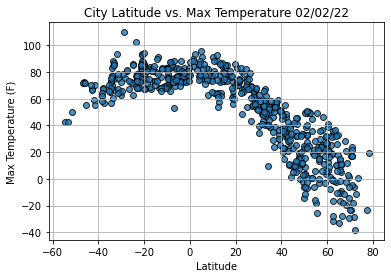

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

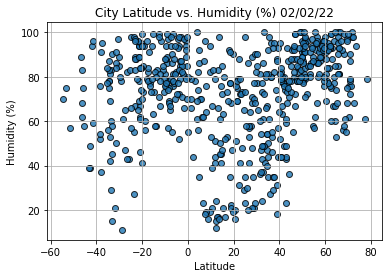

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

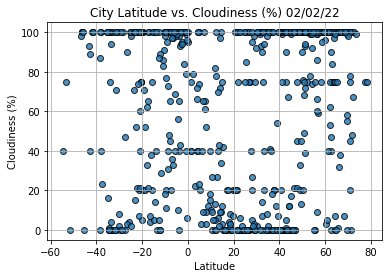

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

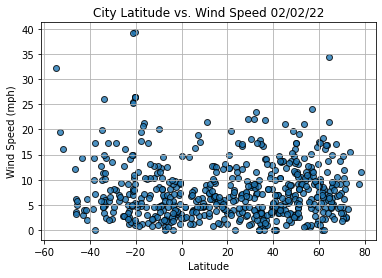

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()